<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D_%EC%83%98%ED%94%8C_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


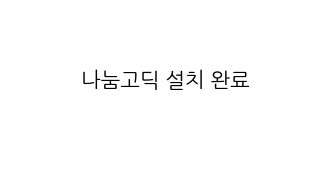

In [1]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# 폰트 캐시 초기화
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 런타임에서 폰트를 새로 인식시킴
import os
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 기본 폰트를 나눔고딕으로 지정
plt.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 확인용 테스트
plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, '나눔고딕 설치 완료', fontsize=15, ha='center')
plt.axis('off')
plt.show()


In [2]:
import pandas as pd

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 첫 번째 시트 로딩
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving poll_answer2.xlsx to poll_answer2.xlsx


In [3]:
age_counts = df['AGE_2'].value_counts().sort_index()

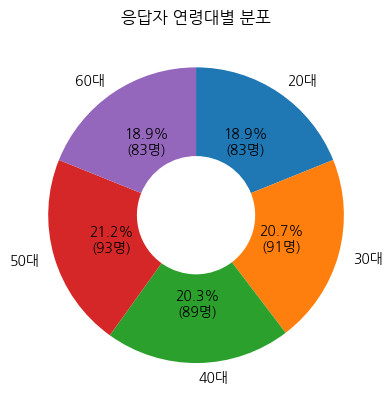

In [9]:
# 색상 스타일 설정 (선택)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# 퍼센트와 빈도수를 같이 보여주는 함수 정의
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute}명)"

# 도넛 차트
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    age_counts,
    labels=age_counts.index,
    autopct=lambda pct: autopct_format(pct, age_counts),
    startangle=90,
    counterclock=False,
    colors=colors[:len(age_counts)],
    wedgeprops={'width': 0.6}
)

# 그래프 타이틀
plt.title('응답자 연령대별 분포')
plt.show()